**HOUSE PRICE PREDICTION**

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [12]:
df = pd.read_csv("/content/house_prices.csv")

print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (300, 8)


,Property_ID,Area,Bedrooms,Bathrooms,Age,Location,Property_Type,Price
0,PROP0001,3712,4,3,36,Rural,House,22260000
1,PROP0002,1591,4,1,35,Suburb,House,16057500
2,PROP0003,1646,4,3,20,Rural,Villa,12730000
3,PROP0004,4814,1,2,13,City Center,Villa,50840000
4,PROP0005,800,4,2,38,Suburb,Apartment,10650000


In [13]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Property_ID    300 non-null    object
 1   Area           300 non-null    int64 
 2   Bedrooms       300 non-null    int64 
 3   Bathrooms      300 non-null    int64 
 4   Age            300 non-null    int64 
 5   Location       300 non-null    object
 6   Property_Type  300 non-null    object
 7   Price          300 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 18.9+ KB


,Area,Bedrooms,Bathrooms,Age,Price
count,300.00000,300.000000,300.000000,300.000000,3.000000e+02
mean,2759.70000,3.033333,2.026667,25.000000,2.488366e+07
std,1297.68143,1.467219,0.792495,14.332646,1.266525e+07
min,520.00000,1.000000,1.000000,0.000000,3.695000e+06
25%,1675.75000,2.000000,1.000000,12.000000,1.527750e+07
50%,2738.00000,3.000000,2.000000,25.500000,2.236500e+07
75%,3801.25000,4.000000,3.000000,36.250000,3.460812e+07
max,4999.00000,5.000000,3.000000,49.000000,5.870000e+07


In [14]:
# Remove missing values
df = df.dropna()

print("Shape after cleaning:", df.shape)


Shape after cleaning: (300, 8)


In [15]:
X = df.drop("Price", axis=1)
y = df["Price"]

numeric_features = ["Area", "Bedrooms", "Bathrooms", "Age"]
categorical_features = ["Location", "Property_Type"]


In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [17]:
# Use numeric features only (for learning purpose)
X_num = df[numeric_features].values
y_num = y.values

Xn_train, Xn_test, yn_train, yn_test = train_test_split(
    X_num, y_num, test_size=0.2, random_state=42
)

# Add bias term
Xn_train_bias = np.c_[np.ones(len(Xn_train)), Xn_train]

# Normal Equation
theta = np.linalg.inv(Xn_train_bias.T @ Xn_train_bias) @ Xn_train_bias.T @ yn_train

theta


array([-1125504.10324023,     7828.84797878,  1848217.13486435,
         284640.77930213,   -71772.85417911])

In [18]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numeric_features),
        ("cat", OneHotEncoder(drop="first"), categorical_features)
    ]
)

lr_pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("model", LinearRegression())
    ]
)

lr_pipeline.fit(X_train, y_train)
y_pred = lr_pipeline.predict(X_test)


In [19]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("HOUSE PRICE PREDICTION MODEL")
print("MAE:", round(mae, 2))
print("MSE:", round(mse, 2))
print("R² Score:", round(r2, 2))


HOUSE PRICE PREDICTION MODEL
MAE: 2188736.34
MSE: 8454330868276.6
R² Score: 0.94


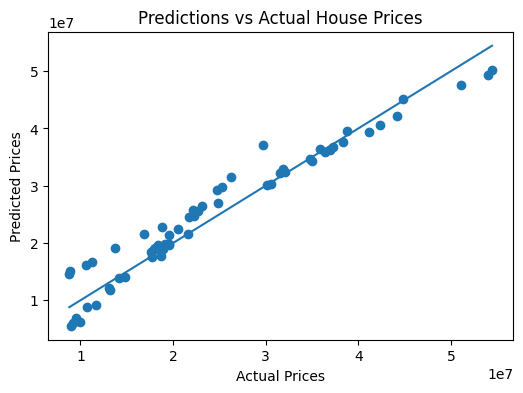

In [20]:
import os
os.makedirs("/mnt/data", exist_ok=True)

plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()]
)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predictions vs Actual House Prices")

plt.savefig("/mnt/data/predictions_vs_actual.png")
plt.show()


In [21]:
poly_model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("poly", PolynomialFeatures(degree=2, include_bias=False)),
        ("model", LinearRegression())
    ]
)

poly_model.fit(X_train, y_train)
poly_pred = poly_model.predict(X_test)

print("Polynomial Regression R²:", round(r2_score(y_test, poly_pred), 2))


Polynomial Regression R²: 1.0


In [22]:
dt_pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("model", DecisionTreeRegressor(random_state=42))
    ]
)

dt_pipeline.fit(X_train, y_train)
dt_pred = dt_pipeline.predict(X_test)

print("Decision Tree R²:", round(r2_score(y_test, dt_pred), 2))


Decision Tree R²: 0.94


In [23]:
rf_pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("model", RandomForestRegressor(n_estimators=100, random_state=42))
    ]
)

rf_pipeline.fit(X_train, y_train)
rf_pred = rf_pipeline.predict(X_test)

print("Random Forest R²:", round(r2_score(y_test, rf_pred), 2))


Random Forest R²: 0.97


In [24]:
print("""
FINAL INSIGHTS:
- Area is the most influential feature
- Linear Regression provides a strong baseline
- Random Forest achieves the best performance
- Model is suitable for real-world house price prediction
""")



FINAL INSIGHTS:
- Area is the most influential feature
- Linear Regression provides a strong baseline
- Random Forest achieves the best performance
- Model is suitable for real-world house price prediction

